In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *

In [2]:
spark = SparkSession.builder \
                    .appName("Read Modes in PySpark") \
                    .master("local[*]") \
                    .getOrCreate()

In [3]:
schema = StructType(
    [
        StructField('customer_id',IntegerType(),False),
        StructField('name',StringType(),False),
        StructField('city',StringType(),False),
        StructField('state',StringType(),False),
        StructField('country',StringType(),False),
        StructField('registration_date',DateType(),False),
        StructField('is_active',BooleanType(),False)
    ]
)

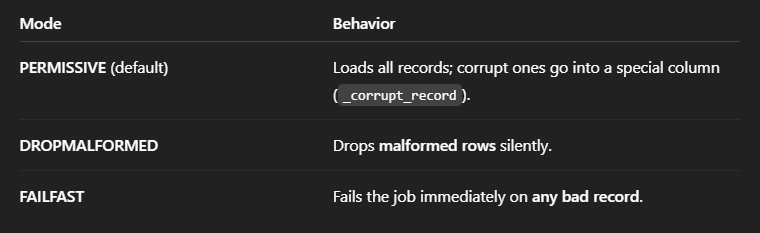

### FailFast
- Spark throws an error and stops reading at the first bad record.
- Best for strict ETL pipelines where data quality must be guaranteed.

In [4]:
dataframe_fail_fast = spark.read \
                            .format('csv') \
                            .option('header', 'true') \
                            .option('inferSchema', 'false') \
                            .schema(schema) \
                            .option('mode', 'FAILFAST') \
                            .load('Customer Data.csv')

In [5]:
dataframe_fail_fast

DataFrame[customer_id: int, name: string, city: string, state: string, country: string, registration_date: date, is_active: boolean]

In [6]:
dataframe_fail_fast.show(5)

+-----------+----------+---------+-----------+-------+-----------------+---------+
|customer_id|      name|     city|      state|country|registration_date|is_active|
+-----------+----------+---------+-----------+-------+-----------------+---------+
|          0|Customer_0|     Pune|West Bengal|  India|       2023-10-10|     true|
|          1|Customer_1|Bangalore|    Gujarat|  India|       2023-10-19|    false|
|          2|Customer_2|Bangalore|  Karnataka|  India|       2023-02-10|     true|
|          3|Customer_3|Bangalore|  Telangana|  India|       2023-03-24|     true|
|          4|Customer_4|Hyderabad|  Telangana|  India|       2023-06-04|    false|
+-----------+----------+---------+-----------+-------+-----------------+---------+
only showing top 5 rows



### DROPMALFORMED
- Completely drops rows that don't match the schema.
- No warning or error—so be cautious.
- Good when you want clean data only and don't care about loss.

In [7]:
dataframe_malformed = spark.read \
                            .format('csv') \
                            .option('header', 'true') \
                            .option('inferSchema', 'false') \
                            .schema(schema) \
                            .option('mode', 'DROPMALFORMED') \
                            .load('../b. Data/Customer Data.csv')

In [8]:
dataframe_malformed

DataFrame[customer_id: int, name: string, city: string, state: string, country: string, registration_date: date, is_active: boolean]

In [9]:
dataframe_malformed.show(5)

+-----------+----------+---------+-----------+-------+-----------------+---------+
|customer_id|      name|     city|      state|country|registration_date|is_active|
+-----------+----------+---------+-----------+-------+-----------------+---------+
|          0|Customer_0|     Pune|West Bengal|  India|       2023-10-10|     true|
|          1|Customer_1|Bangalore|    Gujarat|  India|       2023-10-19|    false|
|          2|Customer_2|Bangalore|  Karnataka|  India|       2023-02-10|     true|
|          3|Customer_3|Bangalore|  Telangana|  India|       2023-03-24|     true|
|          4|Customer_4|Hyderabad|  Telangana|  India|       2023-06-04|    false|
+-----------+----------+---------+-----------+-------+-----------------+---------+
only showing top 5 rows



### PERMISSIVE (Default)
- Loads all rows, even if some fields are bad or missing.
- Malformed rows get added to a special column called _corrupt_record.
- Works well when you're exploring messy data.

In [10]:
dataframe_permissive = spark.read \
                            .format('csv') \
                            .option('header', 'true') \
                            .option('inferSchema', 'false') \
                            .schema(schema) \
                            .option('mode', 'PERMISSIVE') \
                            .load('Customer Data.csv')

In [11]:
dataframe_permissive

DataFrame[customer_id: int, name: string, city: string, state: string, country: string, registration_date: date, is_active: boolean]

In [12]:
dataframe_permissive.show(5)

+-----------+----------+---------+-----------+-------+-----------------+---------+
|customer_id|      name|     city|      state|country|registration_date|is_active|
+-----------+----------+---------+-----------+-------+-----------------+---------+
|          0|Customer_0|     Pune|West Bengal|  India|       2023-10-10|     true|
|          1|Customer_1|Bangalore|    Gujarat|  India|       2023-10-19|    false|
|          2|Customer_2|Bangalore|  Karnataka|  India|       2023-02-10|     true|
|          3|Customer_3|Bangalore|  Telangana|  India|       2023-03-24|     true|
|          4|Customer_4|Hyderabad|  Telangana|  India|       2023-06-04|    false|
+-----------+----------+---------+-----------+-------+-----------------+---------+
only showing top 5 rows

